In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## imports + méthodes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(confusionmatrix, classes):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(8, 5))

    plt.title("Matrice de confusion")

    sns.set(font_scale=1.4)
    ax = sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt='g')

    ax.set_xticklabels(classes,rotation=45)
    ax.set_yticklabels(classes,rotation=0)

    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    plt.close()


def MyshowAllScores(y_test, y_pred):
    classes = ['non_hope', 'neutral', 'hope']
    label_map = {0: 'non_hope', 1: 'hope', 2: 'neutral'}
    y_test_labels = [label_map[label] for label in y_test]
    y_pred_labels = [label_map[label] for label in y_pred]
    print("Accuracy : %0.3f" % (accuracy_score(y_test, y_pred)))
    print("Classification Report")
    print(classification_report(y_test_labels, y_pred_labels, digits=5))
    cnf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    # Afficher la matrice de confusion avec les étiquettes personnalisées
    plot_confusion_matrix(cnf_matrix, classes)

# tweet collection

## Création des dfs


In [ ]:
df = pd.concat([dfAvenirEspoir, dfCapacite, dfChine, dfFestival, dfFete, dfService, dfSecurite, dfShow, df1, df2, df3, df4])
df['labelAsma'] = df['labelAsma'].str.strip()
df['labelGPT'] = df['labelGPT'].str.strip()
df = df.dropna(subset=['labelAsma'])
df = df.drop_duplicates()
df['labelAsma'] = df['labelAsma'].replace({'hope': 'hope', 'no hope': 'non_hope'})
df['labelGPT'] = df['labelGPT'].replace({'hope': 'hope', 'no hope': 'non_hope'})

## Stats


In [ ]:
print("My data frame size :", df.shape[0])

My data frame size : 325


In [ ]:
print(df['labelAsma'].unique())

['hope' 'non_hope' 'neutral']


In [ ]:
df.groupby('labelAsma').describe()

In [ ]:
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame appelé df contenant les données des tweets

# Filtrer les tweets étiquetés avec "hope" et "no hope" pour les étiquettes "labelAsma"
filtered_asma_hope = df[(df['labelAsma'] == 'hope')]
filtered_asma_no_hope = df[(df['labelAsma'] == 'non_hope')]
filtered_asma_neutral = df[(df['labelAsma'] == 'neutral')]

# Obtenir les nombres de tweets pour chaque catégorie
count_asma_hope = len(filtered_asma_hope)
count_asma_no_hope = len(filtered_asma_no_hope)
count_asma_neutral = len(filtered_asma_neutral)


# Créer les données pour l'histogramme
labels = ['labelAsma - Hope', 'labelAsma - non_hope','labelAsma - neutral']
counts = [count_asma_hope, count_asma_no_hope, count_asma_neutral]

# Créer l'histogramme
plt.bar(labels, counts)
plt.xlabel('Catégories')
plt.ylabel('Nombre de tweets')
plt.title('Nombre de tweets étiquetés en "hope" et "non_hope"')

# Afficher l'histogramme
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame appelé df contenant les données des tweets


# Filtrer les tweets étiquetés avec "hope" et "no hope" pour les étiquettes "labelGPT"
filtered_gpt_hope = df[(df['labelGPT'] == 'hope')]
filtered_gpt_no_hope = df[(df['labelGPT'] == 'non_hope')]
filtered_gpt_neutral = df[(df['labelGPT'] == 'neutral')]

# Obtenir les nombres de tweets pour chaque catégorie
count_gpt_hope = len(filtered_gpt_hope)
count_gpt_no_hope = len(filtered_gpt_no_hope)
count_gpt_neutral = len(filtered_gpt_neutral)

# Créer les données pour l'histogramme
labels = ['labelGPT - Hope', 'labelGPT - non_hope','labelGPT - neutral']
counts = [count_gpt_hope, count_gpt_no_hope, count_gpt_neutral]

# Créer l'histogramme
plt.bar(labels, counts)
plt.xlabel('Catégories')
plt.ylabel('Nombre de tweets')
plt.title('Nombre de tweets étiquetés en "hope" et "non_hope" et "neutral"')

# Afficher l'histogramme
plt.show()




# gpt model Evaluation



0
[1 0 2]
Accuracy : 0.748
Classification Report
              precision    recall  f1-score   support

        hope    0.67778   0.89051   0.76972       137
     neutral    0.46667   0.29167   0.35897        24
    non_hope    0.88525   0.69231   0.77698       156

    accuracy                        0.74763       317
   macro avg    0.67656   0.62483   0.63522       317
weighted avg    0.76389   0.74763   0.74219       317



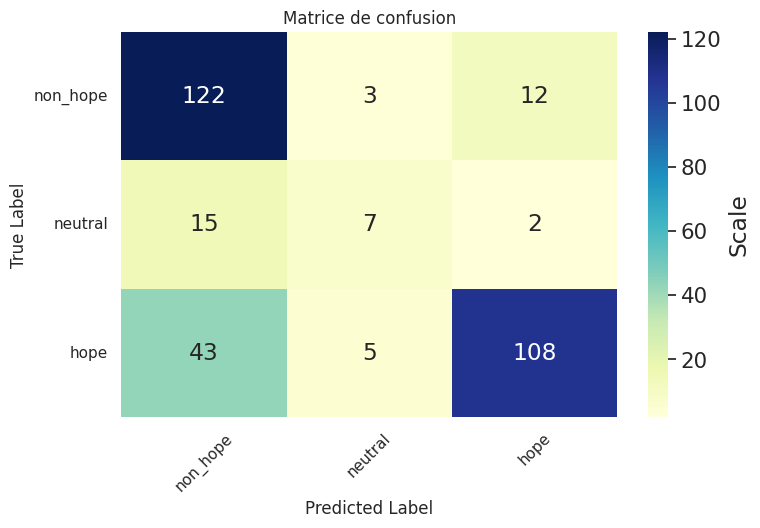

In [ ]:
from sklearn.metrics import confusion_matrix

dfMAJ=df

dfMAJ['labelAsma'] = dfMAJ['labelAsma'].replace({'hope': 1, 'non_hope': 0, 'neutral':2})

# Remplacer les valeurs dans la colonne 'labelGPT'
dfMAJ['labelGPT'] = dfMAJ['labelGPT'].replace({'hope': 1, 'non_hope': 0, 'neutral':2})
dfMAJ1=dfMAJ
dfMAJ1 = dfMAJ1.dropna(subset=['labelGPT'])
print(dfMAJ1['labelGPT'].isna().sum())


true_labels = dfMAJ1['labelAsma']
predicted_labels = dfMAJ1['labelGPT']

unique_values = dfMAJ1['labelAsma'].unique()

# Afficher les valeurs uniques
print(unique_values)

true_labels = true_labels.astype(float)
predicted_labels = predicted_labels.astype(float)

#confusion_matrix = confusion_matrix(true_labels, predicted_labels)
MyshowAllScores(true_labels,predicted_labels)

# Netoyage des données

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_uri(text):
  # expression régulière pour détecter les URI
  pattern = r'https?://\S+|www.\S+'
  # suppression des URI
  return re.sub(pattern, ' ', text)

def removeHashtags(text):
    cleanedText = re.sub(r'#\w+\s*', '', text)
    cleanedText = cleanedText.strip()
    return cleanedText

def replace_emojies_meaning(text):
    emoji_df = pd.read_excel('frenchEmojies.xlsx')
    emoji_dict = dict(zip(emoji_df['EMOJI'], emoji_df['SIGNIFICATION']))
    words = text.split()
    meanings = []
    for i, word in enumerate(words):
        word_meanings = []
        for emoji, meaning in emoji_dict.items():
            if emoji in word:
                word_meanings.append(meaning)
                word = re.sub(re.escape(emoji), "", word)
        if word_meanings:
            meanings.extend(word_meanings)
            words[i] = word
    words.append(" ".join(meanings))
    return " ".join(words)

def eliminer_abbreviation(text):
  dicAbreviation = {
      "toujours" : ['tjrs','tjr'],
      "merci": ['mrc','cimer', ],
      "pour": ['pr'],
      "donc": ['dc','dnc'],
      "désolé": ['dsl'],
      "mais": ['ms'],
      "quelqu'un": ['qqn'],
      "quelque chose": ['qqch'],
      "s'il vous plaît": ['svp'],
      "beaucoup": ['bcp'],
      "salut": ['slt'],
      "jamais": ['jms'],
      "quelque": ['qlq'],
      "quand": ['qd'],
      "quand même": ['qmm'],
      "pourquoi": ['pk','prq','pq'],
      "comment": ['cm'],
      "maintenant": ['mtnt','mnt','mtn'],
      "tout": ['tt'],
      "tous": ['ts'],
      "pour": ['pr'],
      "s'il te plaît": ['stp'],
      "dans": ['ds','dns'],
      "nouvelle": ['nvl'],
      "nouveau":['nv'],
      "bien":['b1']
  }
  for mot, abbreviations in dicAbreviation.items():
      for abbreviation in abbreviations:
          pattern = r"(?<!\w)" + re.escape(abbreviation) + r"(?!\w)"
          text = re.sub(pattern, mot, text)
  return text

def replace_mentions(text):
    cleaned_text = re.sub(r'@\w+', 'UTILISATEUR', text)
    return cleaned_text

def clean(removeUri, removeHashtag, replaceMentions, replaceEmojies, eliminerAbbreviation,lowerCase, text):
  if lowerCase:
    text=text.lower()
  text=text.replace("&amp;","")
  if replaceEmojies :
    text = replace_emojies_meaning(text)
  if removeUri :
    text = remove_uri(text)
  if removeHashtag :
    text = removeHashtags(text)
  if replaceMentions :
    text = replace_mentions(text)
  if eliminerAbbreviation:
    text = eliminer_abbreviation(text)
  return text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# BERT multilingual base model


## import

In [ ]:
!pip install transformers

In [ ]:
from sklearn.model_selection import train_test_split
import transformers
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from sklearn.metrics import classification_report
from torch.nn.functional import sigmoid
import pandas as pd
import numpy as np

##Focal Loss


###TRAIN (40/60) best score


In [ ]:
dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(1,0,1,1,1,1,x))
dfMAJ = dfMAJ[dfMAJ['labelAsma'].isin([1, 0])]
label_values = dfMAJ['labelAsma'].unique()

# Afficher les valeurs de label
print(label_values)
print(len(dfMAJ))

X=dfMAJ['tweet'].tolist()
y=dfMAJ['labelAsma'].tolist()
texts, test_texts, labels, test_labels = train_test_split(X, y,train_size=0.6,random_state=42)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        sample = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.float).unsqueeze(0)  # Add unsqueeze(0) to make it [1, 1]
        }
        return sample

# Define your BERT-based classifier
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# Create the dataset
dataset = TextDataset(texts, labels, tokenizer, max_length)

# Define the batch size and number of epochs
batch_size = 8    #16,32
num_epochs = 8

# Create the train dataloader
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the classifier
model = BertClassifier(num_classes=1)


# Define the focal loss function
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, logits, labels):
        probs = sigmoid(logits)
        pt = probs * labels + (1 - probs) * (1 - labels)
        alpha_factor = self.alpha * labels + (1 - self.alpha) * (1 - labels)
        focal_weight = alpha_factor * torch.pow(1 - pt, self.gamma)

        loss = focal_weight * nn.BCEWithLogitsLoss(reduction='none')(logits, labels)
        return loss.mean()


# Define the loss function and optimizer
criterion = FocalLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

#Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()

test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print('Test Results:')
all_predictions = []
all_labels = []

all_texts = []  # Add a list to store the texts

for batch in test_dataloader:
    list=[]
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    logits = model(input_ids, attention_mask)
    probabilities = sigmoid(logits)
    predictions = torch.round(probabilities).squeeze()
    p = predictions.tolist()
    print(p)
    if isinstance(p, float):
      list.append(p)
      all_predictions.extend(list)
    else :
      all_predictions.extend(p)  #Ajouter la liste de prédictions
    all_labels.extend(batch['labels'].tolist())

target_names = ['Non-hope', 'Hope']
print('\nClassification Report:')
print(classification_report(all_labels, all_predictions, target_names=target_names))


all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

for i in all_predictions:
    print(i)

print(all_predictions)
print(all_labels)
data = [test_texts, all_labels,  all_predictions]
df = pd.DataFrame(data)
df.to_csv('classification_results.csv', index=False)

Test Results:
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0

Classification Report:
              precision    recall  f1-score   support

    Non-hope       0.84      0.78      0.81        65
        Hope       0.77      0.82      0.79        56

    accuracy                           0.80       121
   macro avg       0.80      0.80      0.80       121
weighted avg       0.80      0.80      0.80       121

1.0
1.0
0.0
0.0


In [ ]:
dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(0,0,0,0,1,1,x))
#clean(removeUri, removeHashtag, replaceMentions, replaceEmojies, eliminerAbbreviation,lowerCase, text):
dfMAJ = dfMAJ.drop(dfMAJ[dfMAJ['labelAsma'] == 2].index)
label_values = dfMAJ['labelAsma'].unique()

# Afficher les valeurs de label
print(label_values)

[1 0]


<ipython-input-28-1a91743bd283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(0,0,0,0,1,1,x))


In [ ]:
X=dfMAJ['tweet'].tolist()
y=dfMAJ['labelAsma'].tolist()
texts, test_texts, labels, test_labels = train_test_split(X, y, stratify=y)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        sample = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.float).unsqueeze(0)  # Add unsqueeze(0) to make it [1, 1]
        }
        return sample

# Define your BERT-based classifier
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# Create the dataset
dataset = TextDataset(texts, labels, tokenizer, max_length)

# Define the batch size and number of epochs
batch_size = 8    #16,32
num_epochs = 8

# Create the train dataloader
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the classifier
model = BertClassifier(num_classes=1)


# Define the focal loss function
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, logits, labels):
        probs = sigmoid(logits)
        pt = probs * labels + (1 - probs) * (1 - labels)
        alpha_factor = self.alpha * labels + (1 - self.alpha) * (1 - labels)
        focal_weight = alpha_factor * torch.pow(1 - pt, self.gamma)

        loss = focal_weight * nn.BCEWithLogitsLoss(reduction='none')(logits, labels)
        return loss.mean()


# Define the loss function and optimizer
criterion = FocalLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

#Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()

test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Test Results:')
all_predictions = []
all_labels = []

all_texts = []  # Add a list to store the texts

for batch in test_dataloader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']

    logits = model(input_ids, attention_mask)
    probabilities = sigmoid(logits)
    predictions = torch.round(probabilities).squeeze()
    #print(predictions.tolist())
    all_predictions.extend(predictions.tolist())
    all_labels.extend(batch['labels'].tolist())


target_names = ['Non-hope', 'Hope']
print('\nClassification Report:')
print(classification_report(all_labels, all_predictions, target_names=target_names))

# data = {'Text': all_texts, 'True Label': all_labels, 'Predicted Label': all_predictions}
# print(data)
# df = pd.DataFrame(data)
# df.to_csv('classification_results.csv', index=False)

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

for i in all_predictions:
    print(i)

print(all_predictions)
print(all_labels)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/8 - Loss: 0.0738
Epoch 2/8 - Loss: 0.0563
Epoch 3/8 - Loss: 0.0274
Epoch 4/8 - Loss: 0.0088
Epoch 5/8 - Loss: 0.0007
Epoch 6/8 - Loss: 0.0001
Epoch 7/8 - Loss: 0.0001
Epoch 8/8 - Loss: 0.0000
Test Results:

Classification Report:
              precision    recall  f1-score   support

    Non-hope       0.69      0.92      0.79        24
        Hope       0.87      0.57      0.68        23

    accuracy                           0.74        47
   macro avg       0.78      0.74      0.73        47
weighted avg       0.78      0.74      0.74        47

0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 

### TRAIN_less_data (BEST SCORES)

In [ ]:
dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(0,0,0,0,0,1,x))
#clean(removeUri, removeHashtag, replaceMentions, replaceEmojies, eliminerAbbreviation,lowerCase, text):
dfMAJ = dfMAJ.drop(dfMAJ[dfMAJ['labelAsma'] == 2].index)
label_values = dfMAJ['labelAsma'].unique()

# Afficher les valeurs de label
print(label_values)

In [ ]:
X=dfMAJ['tweet'].tolist()
y=dfMAJ['labelAsma'].tolist()
texts, test_texts, labels, test_labels = train_test_split(X, y, stratify=y)
print(len(texts))
print(len(test_texts))

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        sample = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.float).unsqueeze(0)  # Add unsqueeze(0) to make it [1, 1]
        }
        return sample

# Define your BERT-based classifier
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# Create the dataset
dataset = TextDataset(texts, labels, tokenizer, max_length)

# Define the batch size and number of epochs
batch_size = 8    #16,32
num_epochs = 8

# Create the train dataloader
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the classifier
model = BertClassifier(num_classes=1)


# Define the focal loss function
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, logits, labels):
        probs = sigmoid(logits)
        pt = probs * labels + (1 - probs) * (1 - labels)
        alpha_factor = self.alpha * labels + (1 - self.alpha) * (1 - labels)
        focal_weight = alpha_factor * torch.pow(1 - pt, self.gamma)

        loss = focal_weight * nn.BCEWithLogitsLoss(reduction='none')(logits, labels)
        return loss.mean()


# Define the loss function and optimizer
criterion = FocalLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

#Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()

test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Test Results:')
all_predictions = []
all_labels = []

all_texts = []  # Add a list to store the texts

for batch in test_dataloader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']

    logits = model(input_ids, attention_mask)
    probabilities = sigmoid(logits)
    predictions = torch.round(probabilities).squeeze()
    #print(predictions.tolist())
    all_predictions.extend(predictions.tolist())
    all_labels.extend(batch['labels'].tolist())


target_names = ['Non-hope', 'Hope']
print('\nClassification Report:')
print(classification_report(all_labels, all_predictions, target_names=target_names))

# data = {'Text': all_texts, 'True Label': all_labels, 'Predicted Label': all_predictions}
# print(data)
# df = pd.DataFrame(data)
# df.to_csv('classification_results.csv', index=False)

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

for i in all_predictions:
    print(i)

print(all_predictions)
print(all_labels)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/8 - Loss: 0.0735
Epoch 2/8 - Loss: 0.0585
Epoch 3/8 - Loss: 0.0374
Epoch 4/8 - Loss: 0.0187
Epoch 5/8 - Loss: 0.0082
Epoch 6/8 - Loss: 0.0052
Epoch 7/8 - Loss: 0.0036
Epoch 8/8 - Loss: 0.0055
Test Results:

Classification Report:
              precision    recall  f1-score   support

    Non-hope       0.86      0.79      0.83        24
        Hope       0.80      0.87      0.83        23

    accuracy                           0.83        47
   macro avg       0.83      0.83      0.83        47
weighted avg       0.83      0.83      0.83        47

0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 

## BCEWithLogitsLoss


### Train 1

In [ ]:
X=dfMAJ['tweet'].tolist()
y=dfMAJ['labelAsma'].tolist()
texts, test_texts, labels, test_labels = train_test_split(X, y, stratify=y)

In [ ]:
dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(1,1,1,1,1,1,x))
dfMAJ = dfMAJ.drop(dfMAJ[dfMAJ['labelAsma'] == 2].index)
label_values = dfMAJ['labelAsma'].unique()

# Afficher les valeurs de label
print(label_values)

[1 0]


<ipython-input-33-966d46ba9980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(1,1,1,1,1,1,x))


In [ ]:

# Define your dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        sample = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label
        }

        return sample


# Define your BERT-based classifier
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define the tokenizer and maximum sequence length
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# Create the dataset
dataset = TextDataset(texts, labels, tokenizer, max_length)

# Define the batch size and number of epochs
batch_size = 8  #18
num_epochs = 10     #5,7

# Create the train dataloader
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the classifier
model = BertClassifier(num_classes=1)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].unsqueeze(1).float()

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}')


test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()

all_predictions = []
all_labels = []
for batch in test_dataloader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']

    logits = model(input_ids, attention_mask)
    predictions = torch.sigmoid(logits)

    all_predictions.extend(predictions.round().tolist())
    all_labels.extend(batch['labels'].tolist())

target_names = ['Non-Hope', 'Hope']
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=target_names))

print('Confusion Matrix:')
cm = confusion_matrix(all_labels, all_predictions)
print(cm)


# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
print(all_predictions)
print(all_labels)


# Create a DataFrame with predictions and labels
# predictions_data = {'Text': test_texts, 'True Label': all_labels, 'Predicted Label': all_predictions}
# predictions_df = pd.DataFrame(predictions_data)
#
# # Save the DataFrame to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/10 - Loss: 0.6625
Epoch 2/10 - Loss: 0.6418
Epoch 3/10 - Loss: 0.4607
Epoch 4/10 - Loss: 0.3539
Epoch 5/10 - Loss: 0.1234
Epoch 6/10 - Loss: 0.0306
Epoch 7/10 - Loss: 0.0122
Epoch 8/10 - Loss: 0.0075
Epoch 9/10 - Loss: 0.0053
Epoch 10/10 - Loss: 0.0043
Classification Report:
              precision    recall  f1-score   support

    Non-Hope       0.84      0.67      0.74        24
        Hope       0.71      0.87      0.78        23

    accuracy                           0.77        47
   macro avg       0.78      0.77      0.76        47
weighted avg       0.78      0.77      0.76        47

Confusion Matrix:
[[16  8]
 [ 3 20]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 

### Train 2

In [ ]:
dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(0,0,0,0,0,1,x))
dfMAJ = dfMAJ.drop(dfMAJ[dfMAJ['labelAsma'] == 2].index)
label_values = dfMAJ['labelAsma'].unique()

# Afficher les valeurs de label
print(label_values)

[1 0]


<ipython-input-20-e550329f0c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMAJ['tweet'] = dfMAJ['tweet'].apply(lambda x: clean(0,0,0,0,0,1,x))


In [ ]:
X=dfMAJ['tweet'].tolist()
y=dfMAJ['labelAsma'].tolist()
texts, test_texts, labels, test_labels = train_test_split(X, y, stratify=y)

In [ ]:

# Define your dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        sample = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label
        }

        return sample


# Define your BERT-based classifier
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define the tokenizer and maximum sequence length
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# Create the dataset
dataset = TextDataset(texts, labels, tokenizer, max_length)

# Define the batch size and number of epochs
batch_size = 8  #18
num_epochs = 10     #5,7

# Create the train dataloader
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the classifier
model = BertClassifier(num_classes=1)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].unsqueeze(1).float()

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}')


test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()

all_predictions = []
all_labels = []
for batch in test_dataloader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']

    logits = model(input_ids, attention_mask)
    predictions = torch.sigmoid(logits)

    all_predictions.extend(predictions.round().tolist())
    all_labels.extend(batch['labels'].tolist())

target_names = ['Non-Hope', 'Hope']
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=target_names))

print('Confusion Matrix:')
cm = confusion_matrix(all_labels, all_predictions)
print(cm)


# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
print(all_predictions)
print(all_labels)


# Create a DataFrame with predictions and labels
# predictions_data = {'Text': test_texts, 'True Label': all_labels, 'Predicted Label': all_predictions}
# predictions_df = pd.DataFrame(predictions_data)
#
# # Save the DataFrame to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/10 - Loss: 0.6713
Epoch 2/10 - Loss: 0.6198
Epoch 3/10 - Loss: 0.4262
Epoch 4/10 - Loss: 0.1456
Epoch 5/10 - Loss: 0.0284
Epoch 6/10 - Loss: 0.0130
Epoch 7/10 - Loss: 0.0637
Epoch 8/10 - Loss: 0.0338
Epoch 9/10 - Loss: 0.0084
Epoch 10/10 - Loss: 0.0044
Classification Report:
              precision    recall  f1-score   support

    Non-Hope       0.70      0.79      0.75        24
        Hope       0.75      0.65      0.70        23

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47

Confusion Matrix:
[[19  5]
 [ 8 15]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]
[0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 

# Camembert model

# Roberta model